**Note:** This is a temporary test environment in which you can play around with Manim without the need of installing it locally. Keep in mind that this is a *temporary* environment, though: your changes will not be saved and cannot be shared with others. To save your work, you will need to download the notebook file ("File > Download as > Notebook (.ipynb)"). Enjoy!

*Useful resources:* [Documentation](https://docs.manim.community), [Discord](https://discord.gg/mMRrZQW), [Reddit](https://www.reddit.com/r/manim/)

In [1]:
from manim import *

Manim Community v0.14.0

In [8]:
%%manim -qm -v WARNING GetZAxisLabelExample

class GetZAxisLabelExample(ThreeDScene):
    def get_sine_wave_y(self,dx=0, dscale=1, damp=1):
        return ParametricFunction(
            lambda x: np.array([
                x,
                damp * np.sin(dscale * (x + dx)),
                0
            ]), color=GREEN, t_range=(-PI, PI),
        ) #.set_shade_in_3d(True)

    def get_sine_wave_z(self,dx=0, dscale=1, damp=1):
        return ParametricFunction(
            lambda x: np.array([
                x,
                0,
                damp * np.sin(dscale * (x + dx))
            ]), color=BLUE, t_range=(-PI, PI),
        ) #.set_shade_in_3d(True)

    def get_sine_wave_polar(self,dx=0, dscale=1, damp=1):
        return ParametricFunction(
            lambda x: np.array([
                x,
                damp * np.sin(dscale * (x + dx)),
                damp * np.cos(dscale * (x + dx)),
            ]), color=RED, t_range=(-PI, PI),
        ) #.set_shade_in_3d(True)


    def construct(self):
        self.camera.background_color=WHITE
        ax = ThreeDAxes(x_range=(-0.5, 2*PI + 0.5, 1), x_length=2*PI + 1, y_range=(-3,3,1), y_length=6, z_range=(-4,4,1), axis_config={
                "include_ticks": False,
                # "include_tip": False,
            },).set_color(BLACK)
        labx = ax.get_x_axis_label(Tex("$x$")).set_color(BLACK)
        laby = ax.get_y_axis_label(Tex("$y$")).set_color(BLACK)
        labz = ax.get_z_axis_label(Tex("$z$")).set_color(BLACK)

        #area2 = ax.get_area(curve2, x_range=(0, 2*PI), color=GREEN)
        #self.add(area2)
        #area2 = ax.get_area(curve2, x_range=(0, PI))
        #self.add(area2)

        #line1 = ax.get_vertical_lines_to_graph(curve1, x_range=[0,2*PI],num_lines=15, color=RED_B)
        #self.add(line1)
        #line2 = ax.get_vertical_lines_to_graph(curve2, x_range=[0,2*PI],num_lines=15, color=BLUE_B)
        #self.add(line2)
        #line3 = ax.get_vertical_lines_to_graph(curve3, x_range=[0,2*PI],num_lines=15, color=GREEN_B)
        #self.add(line3)

        self.add(ax)
        # self.add(curve1)

        # self.add(curve2)
        d_theta=ValueTracker(0)
        self.add(d_theta)

        d_scale=ValueTracker(1)
        self.add(d_scale)

        d_amp=ValueTracker(1)
        self.add(d_amp)

        def update_wave_y(func):
            func.become(
                self.get_sine_wave_y(dx=d_theta.get_value(), dscale=d_scale.get_value(), damp=d_amp.get_value())
            )
            return func
        sine_function_y=self.get_sine_wave_y()
        sine_function_y.add_updater(update_wave_y)

        def update_wave_z(func):
            func.become(
                self.get_sine_wave_z(dx=d_theta.get_value(), dscale=d_scale.get_value(), damp=d_amp.get_value())
            )
            return func
        sine_function_z=self.get_sine_wave_z()
        sine_function_z.add_updater(update_wave_z)

        def update_wave_polar(func):
            func.become(
                self.get_sine_wave_polar(dx=d_theta.get_value(), dscale=d_scale.get_value(), damp=d_amp.get_value())
            )
            return func
        polar_sine_function=self.get_sine_wave_polar()
        polar_sine_function.add_updater(update_wave_polar)

        ## Animation
        self.play(Create(sine_function_y), run_time=2)
        self.play(d_theta.animate.increment_value(4*PI), run_time=4, rate_func=rate_functions.linear)
        d_theta.set_value(0)
        
        self.play(d_scale.animate.set_value(2), run_time=2)
        self.play(d_theta.animate.increment_value(4*PI), run_time=4, rate_func=rate_functions.linear)
        d_theta.set_value(0)
        self.play(d_scale.animate.set_value(1), run_time=2)
        self.play(d_amp.animate.set_value(2), run_time=2)
        self.play(d_theta.animate.increment_value(4*PI), run_time=4, rate_func=rate_functions.linear)
        self.play(d_amp.animate.set_value(1))
        
        # Change to a 3D View
        self.move_camera(phi=-45 * DEGREES, theta=-135 * DEGREES, gamma=-45 * DEGREES) #,  frame_center=(-0.3,0.9,0), zoom=1.5)
        self.wait()

        self.play(Create(sine_function_z), run_time=2)
        self.play(d_theta.animate.increment_value(4*PI), run_time=4, rate_func=rate_functions.linear)
        self.play(Uncreate(sine_function_z.reverse_direction()), Uncreate(sine_function_y.reverse_direction()), run_time=2)
        d_scale.set_value(3)
        self.play(Create(polar_sine_function), run_time=2)
        self.play(d_theta.animate.increment_value(4*PI), run_time=4, rate_func=rate_functions.linear)
        
        # self.animate_camera_orientation(phi=65 * DEGREES, theta=-72 * DEGREES,  frame_center=(-0.3,0.9,0), zoom=1.5)

        # self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        # self.add(curve3)
        # self.begin_ambient_camera_rotation(rate=0.1)
        # self.wait()
        # self.stop_ambient_camera_rotation()
        # self.move_camera(phi=75 * DEGREES, theta=30 * DEGREES)
        # self.wait()


        #self.add(labx, laby, labz)

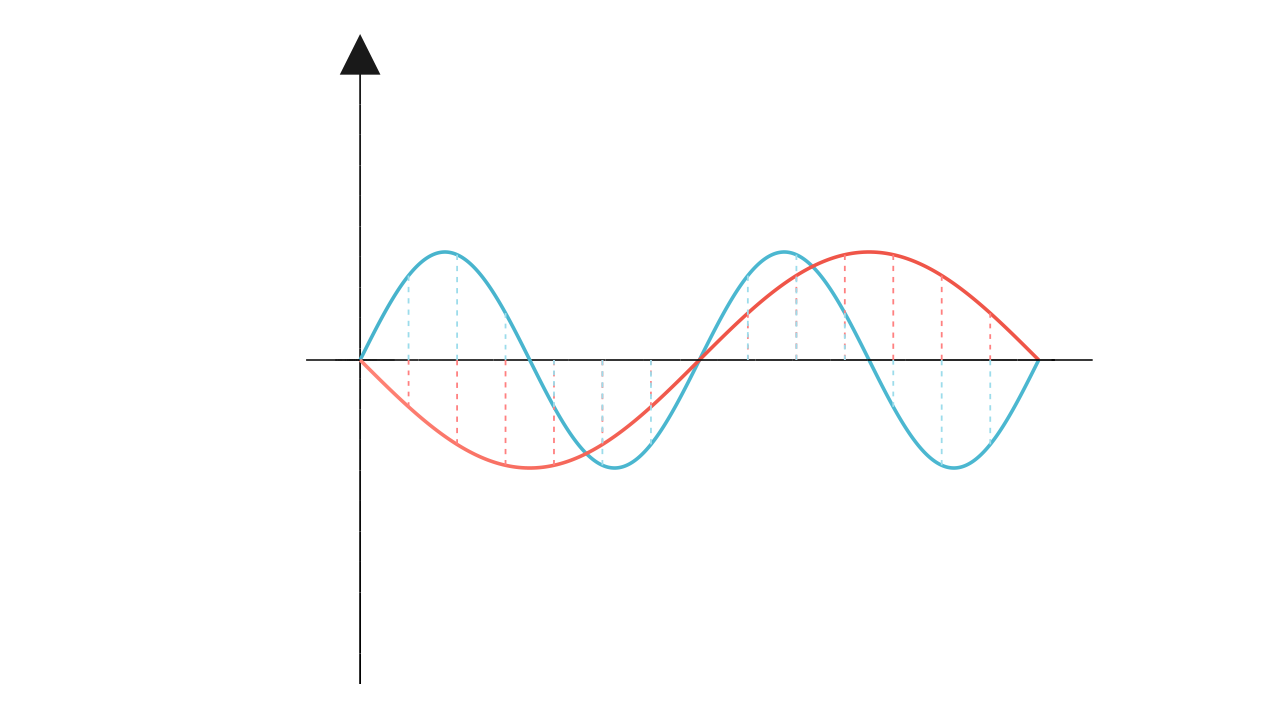

In [3]:
%%manim -qm -v WARNING GetZAxisLabelExample

class GetZAxisLabelExample(ThreeDScene):
    
    def construct(self):
        self.camera.background_color=WHITE
        ax = ThreeDAxes(x_range=(-0.5, 2*PI + 0.5, 1), x_length=2*PI + 1, y_range=(-1.5,1.5,1), y_length=3, z_range=(-3,3,1), z_length=6, axis_config={
                "include_ticks": False,
                # "include_tip": False,
            },).set_color(BLACK)
        labx = ax.get_x_axis_label(Tex("$x$")).set_color(BLACK)
        laby = ax.get_y_axis_label(Tex("$y$")).set_color(BLACK)
        labz = ax.get_z_axis_label(Tex("$z$")).set_color(BLACK)
              
        curve1 = ParametricFunction(
            lambda u: np.array([
                u,
                0,
                np.sin(u)
            ]), color=RED, t_range=(-PI, PI),
        ).set_shade_in_3d(True)
        
        curve2 = ParametricFunction(
            lambda u: np.array([
                u,
                0,
                np.sin(2*u)
            ]), color=BLUE, t_range=(-PI, PI),
        ).set_shade_in_3d(True)
        
        line1 = ax.get_vertical_lines_to_graph(curve1, x_range=[0,2*PI],num_lines=15, color=RED_B)
        self.add(line1)
        line2 = ax.get_vertical_lines_to_graph(curve2, x_range=[0,2*PI],num_lines=15, color=BLUE_B)
        self.add(line2)
        
        self.add(curve1)
        self.add(curve2)
        self.set_camera_orientation(phi=90 * DEGREES, theta=-90 * DEGREES,  frame_center=(-0.3,0,0), zoom=1.2)
        self.add(ax)
        #self.add(labx, laby, labz)

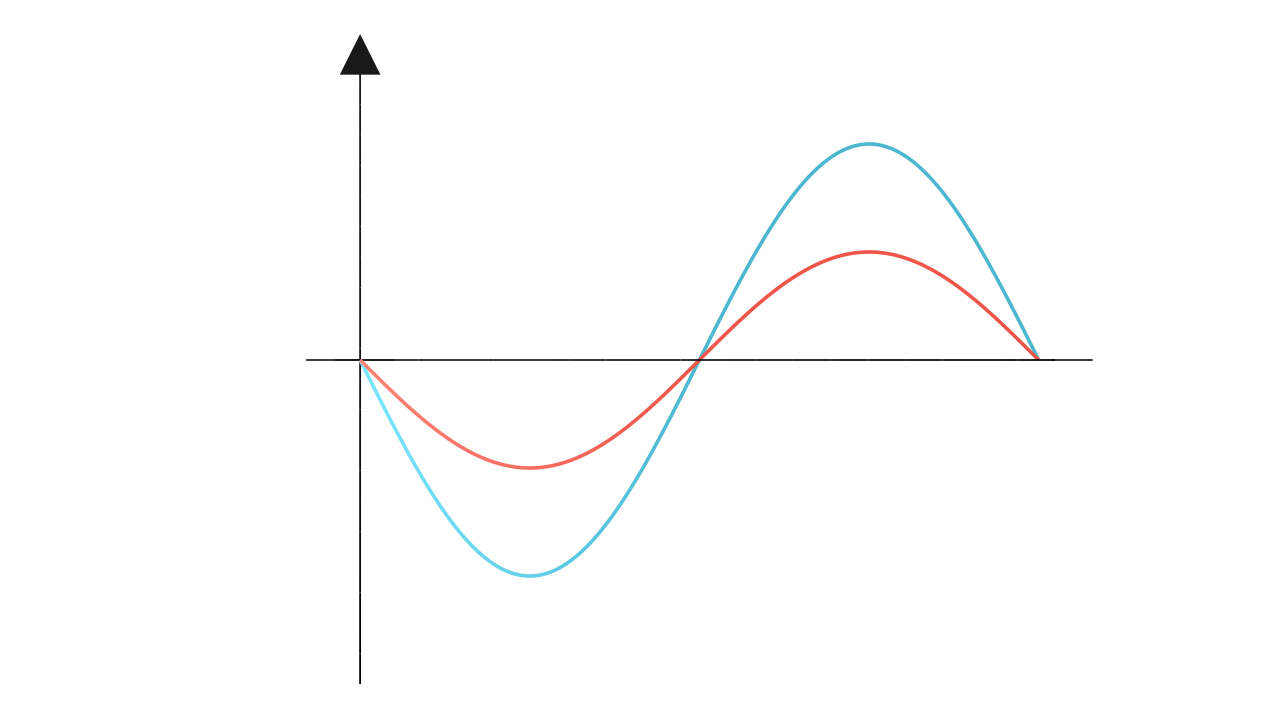

In [23]:
%%manim -qm -v WARNING GetZAxisLabelExample

class GetZAxisLabelExample(ThreeDScene):
    
    def construct(self):
        self.camera.background_color=WHITE
        ax = ThreeDAxes(x_range=(-0.5, 2*PI + 0.5, 1), x_length=2*PI + 1, y_range=(-1.5,1.5,1), y_length=3, z_range=(-3,3,1), z_length=6, axis_config={
                "include_ticks": False,
                # "include_tip": False,
            },).set_color(BLACK)
        labx = ax.get_x_axis_label(Tex("$x$")).set_color(BLACK)
        laby = ax.get_y_axis_label(Tex("$y$")).set_color(BLACK)
        labz = ax.get_z_axis_label(Tex("$z$")).set_color(BLACK)
              

        
        curve2 = ParametricFunction(
            lambda u: np.array([
                u,
                0,
                2* np.sin(u)
            ]), color=BLUE, t_range=(-PI, PI),
        ).set_shade_in_3d(True)
        
        curve1 = ParametricFunction(
            lambda u: np.array([
                u,
                0,
                np.sin(u)
            ]), color=RED, t_range=(-PI, PI),
        ).set_shade_in_3d(True)
        
        
        # line1 = ax.get_vertical_lines_to_graph(curve1, x_range=[0,2*PI],num_lines=15, color=RED_B)
        # self.add(line1)
        # line2 = ax.get_vertical_lines_to_graph(curve2, x_range=[0,2*PI],num_lines=15, color=BLUE_B)
        # self.add(line2)
        
        self.add(curve1)
        self.add(curve2)
        self.set_camera_orientation(phi=90 * DEGREES, theta=-90 * DEGREES,  frame_center=(-0.3,0,0), zoom=1.2)
        self.add(ax)
        #self.add(labx, laby, labz)